In [1]:
from matplotlib import rc
from jupyterthemes import jtplot

import pandas as pd
import numpy as np
import os

from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib as mpl

cmap = LinearSegmentedColormap.from_list('mycmap', ['black', 'orange', 'red'])


rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
mpl.rcParams.update({'font.size': 12})


def set_size(width='thesis', fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 398
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [17]:
MyModelSaveRoot = "F:\MyMasters\Code\MyCode\TrainedModels"
MyModelName = "PET_1_0_Coronal"
OutPath = "F:\Output\Figs"

In [18]:
history = pd.read_csv(os.path.join(MyModelSaveRoot, MyModelName + ".csv"))
history

,epoch,loss,mean_io_u,val_loss,val_mean_io_u
0,0,0.090444,0.909154,0.056437,0.934805
1,1,0.093669,0.905033,0.056573,0.938574
2,2,0.092708,0.908669,0.055632,0.935059
3,3,0.082936,0.913720,0.053945,0.935850
4,4,0.085096,0.912239,0.062228,0.916052
5,5,0.082488,0.910576,0.054222,0.935488
6,6,0.086460,0.911847,0.055347,0.938185
7,7,0.090992,0.909454,0.051246,0.942150
8,8,0.089913,0.908857,0.056499,0.921061
9,9,0.086181,0.912229,0.051420,0.942052


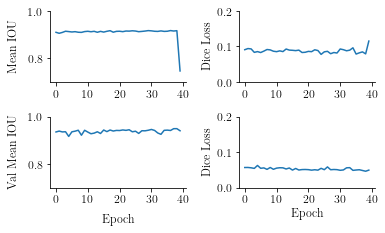

In [22]:
fig, axs = plt.subplots(2, 2, figsize=set_size(width='thesis', fraction=1, subplots=(2, 2)))
for ax in axs.flat:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
    #ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))

axs[0, 0].set_ylim((0.85, 0.95))
#axs[0, 0].set_xlabel('Epoch', labelpad=10)
axs[0, 0].set_ylabel('Mean IOU', labelpad=10)
axs[0, 0].plot(history.mean_io_u)

axs[0, 1].set_ylim((0, 0.20))
#axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Dice Loss')
axs[0, 1].plot(history.loss)

axs[1, 0].set_ylim((0.85, 0.95))
axs[1, 0].set_xlabel('Epoch', labelpad=10)
axs[1, 0].set_ylabel('Val Mean IOU', labelpad=10)
axs[1, 0].plot(history.val_mean_io_u)

axs[1, 1].set_ylim((0, 0.20))
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Dice Loss')
axs[1, 1].plot(history.val_loss)

fig.tight_layout()

save_name = MyModelName
plt.savefig(os.path.join(OutPath, save_name+".pdf"), bbox_inches='tight')